# Assignment 3: K-means clustering

## Description

In this assignment, you are going to implement k-means algorithm on MNIST, given the MNIST dataset array of shape 70000\*784, you have to output an array of 70000 assigned cluster indices.

## Requirement

The only requirement is that the mean L2 distance from the data points to the corresponding cluster centroids should be less than a certain value. Your k-means should iteratively minimize this objective.

To run the algorithm step-by-step, you have to implement k-means as a **generator**. The following is a reference of what Python generator is: [https://stackabuse.com/python-generators/](https://stackabuse.com/python-generators/).

## Scoring and Submission

Your assignment score will be printed out while running k-means! There is no time limit this time, after you click *Runtime / Restart and run all* and have your ideal score printed out, you can download this notebook as `XXXXXXX.ipynb` and upload it to E3, where `XXXXXXX` is your student ID.

- You have to "restart and run all", and **keep the output of the last cell when you download this notebook**.
- You only need to submit the `.ipynb` file to E3, do not zip it!

In [1]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

import os, pickle
import numpy as np
from PIL import Image
from IPython.display import display


def load_mnist():
  if not os.path.exists('mnist.pkl'):
    url = 'https://lab.djosix.com/mnist.pkl.gz'
    assert os.system(f'wget -O mnist.pkl.gz {url}') == 0
    assert os.system('gunzip mnist.pkl.gz') == 0

  with open('mnist.pkl', 'rb') as f:
    return pickle.load(f)


def sample_from_clusters(X, cluster_indices, num_clusters, k=32):
  """
  Sample k MNIST images from each cluster, one row per cluster, and form an image.
  """

  rows = []

  for i in range(num_clusters):
    row = X[np.where(cluster_indices == i)]
    if row.shape[0] == 0:
      print('Warning: cluster {} is empty'.format(i))
      row = np.zeros([28, k * 28], dtype=np.uint8)
    else:
      row = row[np.random.choice(row.shape[0], size=k, replace=True)]
      row = row.reshape(-1, 28, 28) # each datapoint is an 28x28 image
      row = np.concatenate(row, 1)

    rows.append(row) # sampled images
    rows.append(np.full([1, row.shape[1]], 255, dtype=np.uint8)) # white line

  rows = np.concatenate(rows, 0)

  return Image.fromarray(rows)


def compute_mean_distance(X, cluster_indices, num_clusters):
  """
  Compute mean L2 distance from data points to their cluster centroids.
  """
  assert X.shape[0] == cluster_indices.shape[0], 'size not matched'

  total = np.zeros([num_clusters, X.shape[1]])
  count = np.zeros([num_clusters])

  for x, c in zip(X, cluster_indices):
    total[c] += x
    count[c] += 1

  count[count == 0] = 1 # avoid zero division when there is nothing in a cluster
  means = total / count[:, np.newaxis]

  distances = np.sqrt(np.power(X - means[cluster_indices], 2).sum(1))
  return distances.mean()


def your_score(mean_distance):
  r = (mean_distance - 1575) / (1700 - 1575)
  return round(min(max(100 - 50 * r, 0), 100))

###########################
# DO NOT CHANGE THIS CELL #
###########################

## Implement your k-means

In [2]:

def kmeans(X, num_clusters):
  """
  Run K-means algorithm on X and yield assigned cluster indices at each steps.

  Args:
    X (np.ndarray):
      An array of size N*D, where N is the dataset size and D is the number of
      features. For MNIST, N is 70000 and D is 784 (28x28).
    num_clusters (int):
      Number of clusters.
  
  Yields:
    (np.ndarray)
      An integer array of cluster indices (start from 0) assigned to each
      data points, the array size should be N.
  """

  # NOTE: If your code includes randomness, please set a seed so that we can
  #       reproduce your result. You can try other seeds to get better score.
  np.random.seed(1337)

  # TODO: Implement k-means here
  import pandas as pd
  from scipy.spatial import distance
  idx=np.random.choice(len(X),num_clusters,replace=False)
  centroids=X[idx, :]   #取第1維中下標為idx的所有值
  P=np.argmin(distance.cdist(X,centroids,'euclidean'),axis=1) #取歐幾里得距離
    

  while True:
    # Take one k-means step
    centroids=np.vstack([X[P==i,:].mean(axis=0) for i in range(num_clusters)])
    tmp=np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)

    # Yield cluster index for each point in X assigned by this k-means step
    yield P

    # You should implement a stopping criterion
    if np.array_equal(P,tmp):
      break
    P=tmp
  return 
    #yield np.random.randint(num_clusters, size=X.shape[0])


## Test your k-means

step: 0, mean_distance: 1657.0122796643802, score: 67


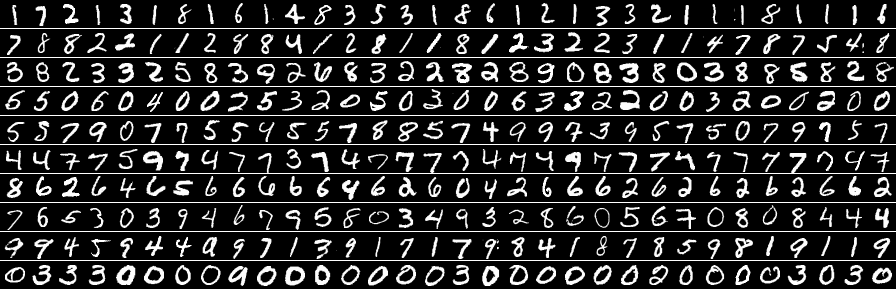

step: 1, mean_distance: 1613.752296369052, score: 84


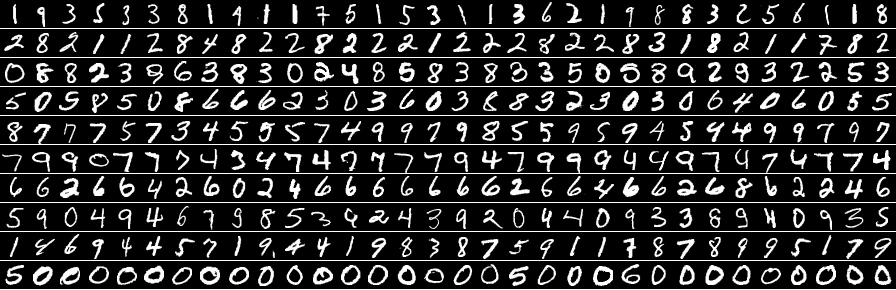

step: 2, mean_distance: 1598.8710702668532, score: 90


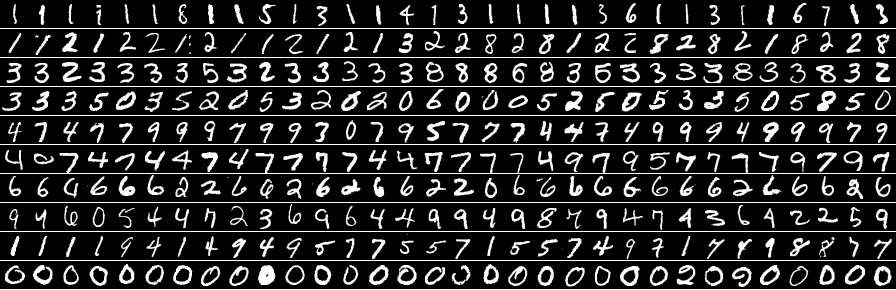

step: 3, mean_distance: 1591.6954911576606, score: 93


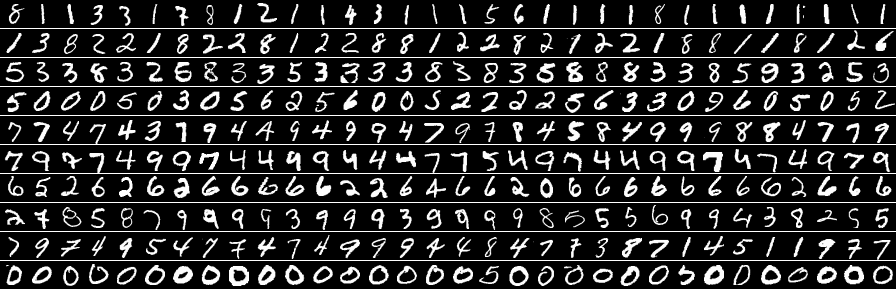

step: 4, mean_distance: 1587.133443542275, score: 95


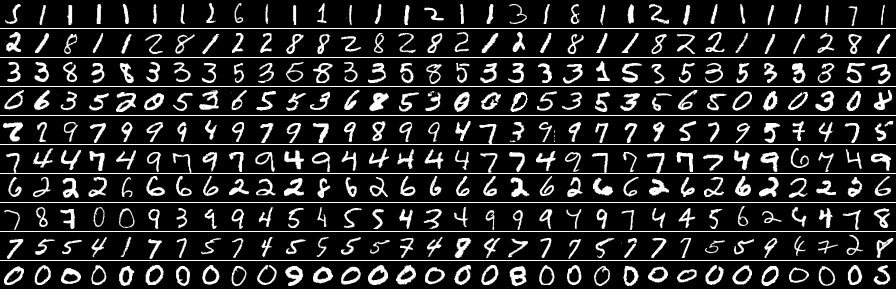

step: 5, mean_distance: 1584.8328832122556, score: 96


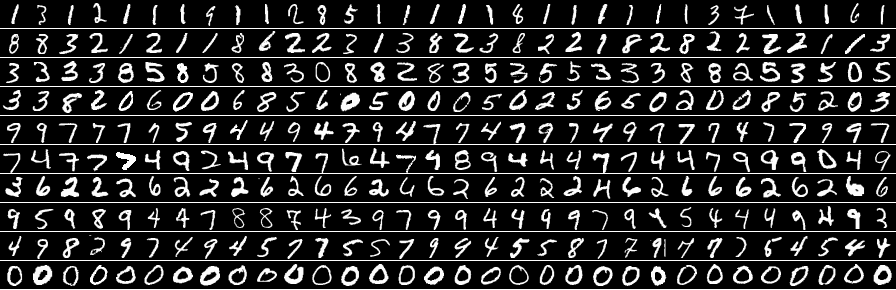

step: 6, mean_distance: 1583.6450437174144, score: 97


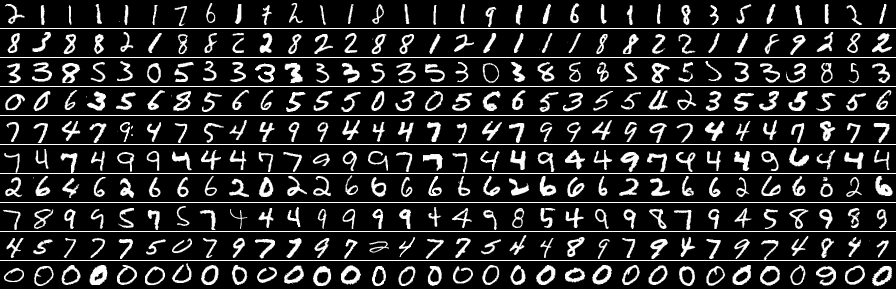

step: 7, mean_distance: 1583.0389221433047, score: 97


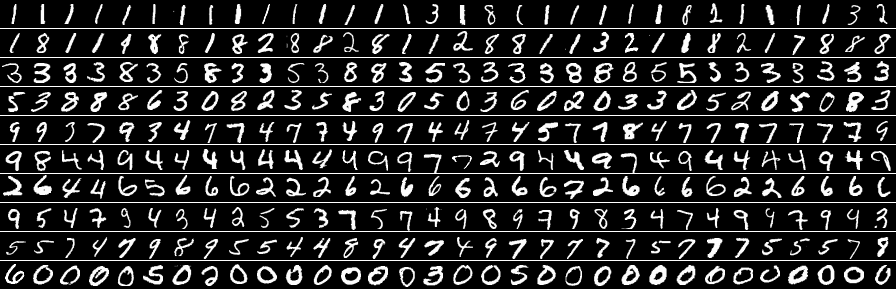

step: 8, mean_distance: 1582.6412042128736, score: 97


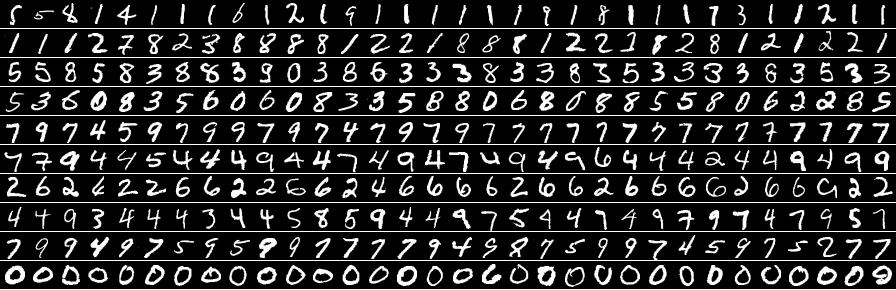

step: 9, mean_distance: 1582.2829059439068, score: 97


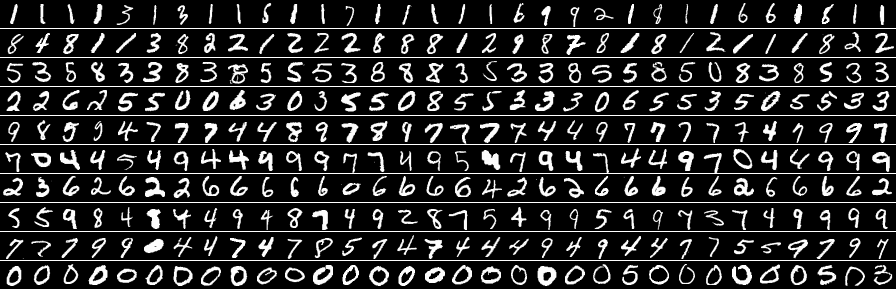

step: 10, mean_distance: 1581.9362776407092, score: 97


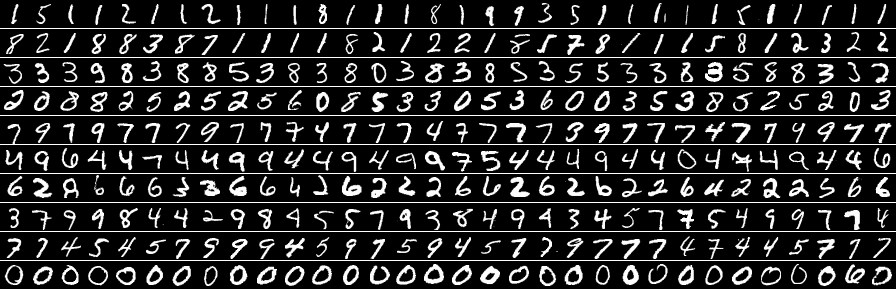

step: 11, mean_distance: 1581.5655749053979, score: 97


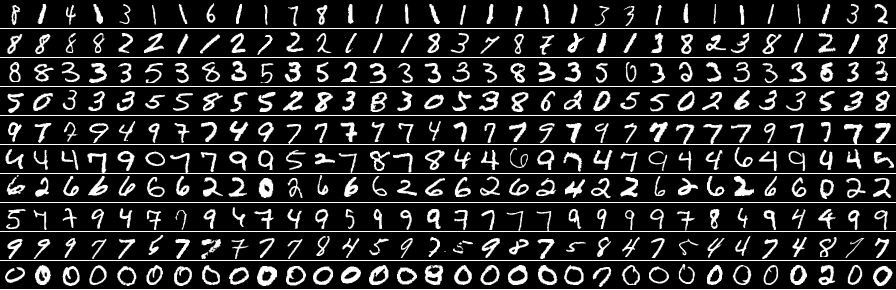

step: 12, mean_distance: 1581.168251038301, score: 98


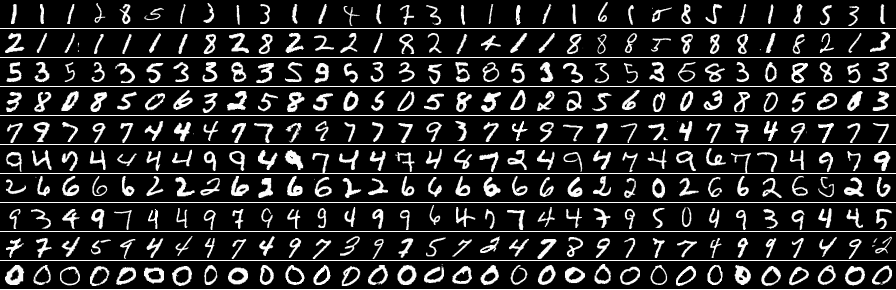

step: 13, mean_distance: 1580.6596259377534, score: 98


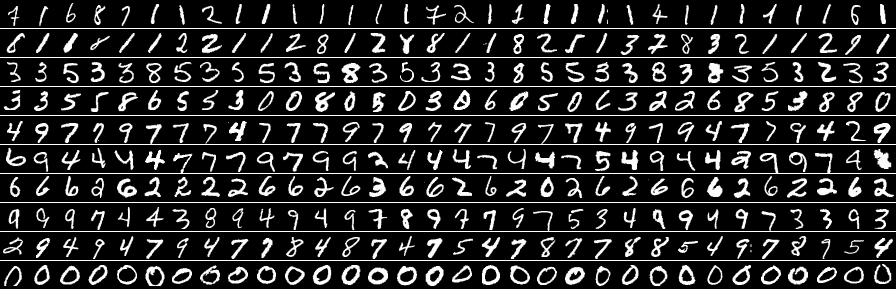

step: 14, mean_distance: 1580.0080849451397, score: 98


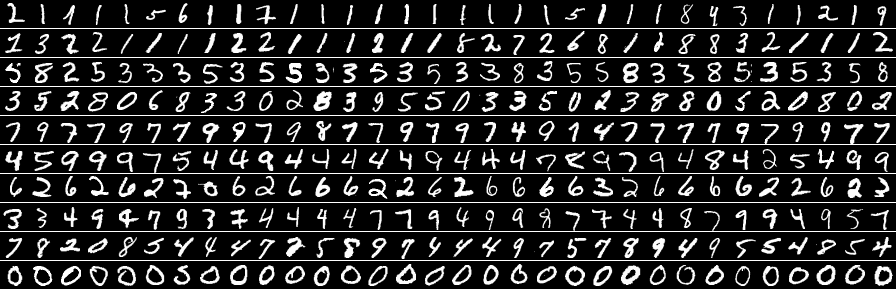

step: 15, mean_distance: 1579.2403750408253, score: 98


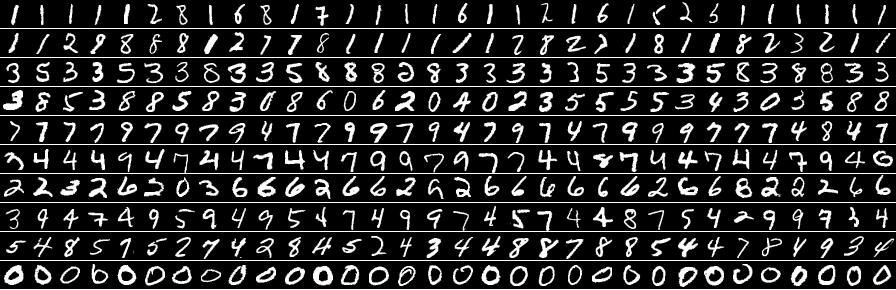

step: 16, mean_distance: 1578.3791300836251, score: 99


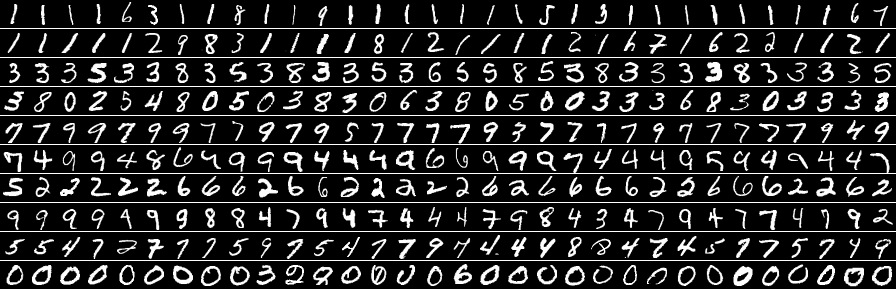

step: 17, mean_distance: 1577.513688745176, score: 99


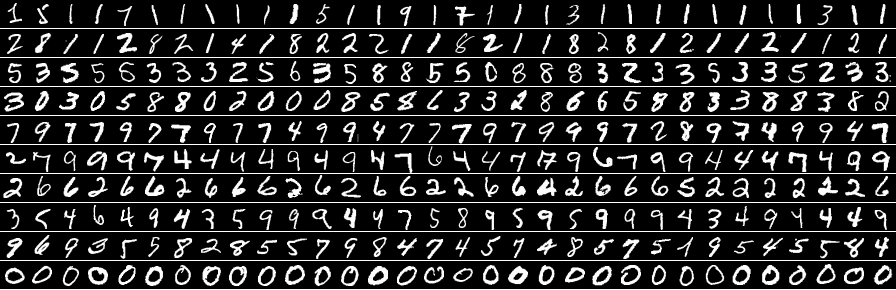

step: 18, mean_distance: 1576.735549020857, score: 99


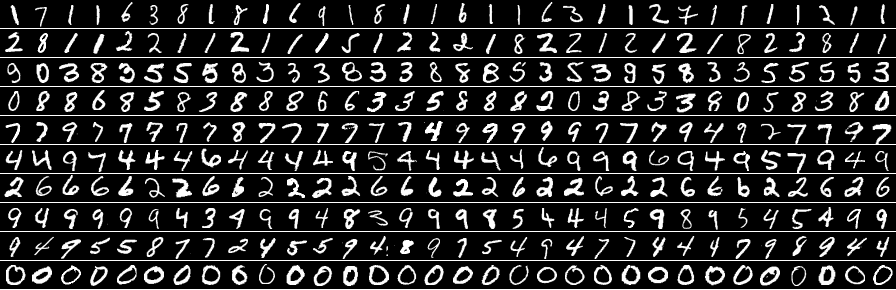

step: 19, mean_distance: 1576.0807572184513, score: 100


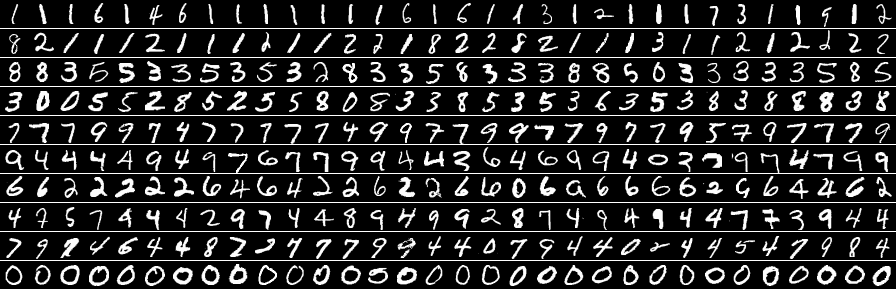

In [3]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

X, _ = load_mnist()
num_clusters = 10

for i, cluster_indices in enumerate(kmeans(X, num_clusters)):
  mean_distance = compute_mean_distance(X, cluster_indices, num_clusters)
  score = your_score(mean_distance)
  print(f'step: {i}, mean_distance: {mean_distance}, score: {score}')
  
  display(sample_from_clusters(X, cluster_indices, num_clusters))

  if score == 100:
    break

###########################
# DO NOT CHANGE THIS CELL #
###########################